In [10]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
epoch_num = 5
batch_size = 16
learning_rate = 5e-3

In [12]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='../../data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [13]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [14]:
class_list = train_dataset.classes

torch.Size([16, 3, 32, 32]) torch.Size([16])


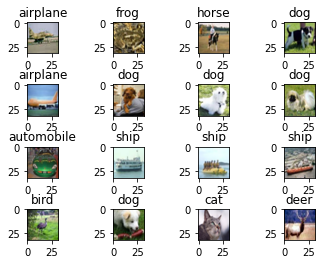

In [15]:
train_features, train_labels = next(iter(train_loader))
print(train_features.size(), train_labels.size())

fig, axs = plt.subplots(4, 4)
plt.subplots_adjust(wspace=0.1, hspace=1)
for i in range(16):
    img = torch.moveaxis(train_features[i], 0, 2)
    label = class_list[train_labels[i].item()]
    axs[i // 4, i % 4].imshow(img)
    axs[i // 4, i % 4].set_title(label)
plt.imshow(img)

In [16]:
class Conv(nn.Module):
    def __init__(self, class_num=10):
        super(Conv, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.linear = nn.Linear(8 * 8 * 32, class_num)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)

        return self.linear(out)


In [17]:
model = Conv(10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
for epoch in range(epoch_num):
    for i, (pic, label) in enumerate(train_loader):
        pic = pic.to(device)
        label = label.to(device)
        output = model(pic)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 500 == 0:
            print(f'Training Epoch: {epoch + 1}/{epoch_num} [{i}/{len(train_loader)}]\tLoss: {loss.item():0.4f}\tLR: {learning_rate:0.6f}')
torch.cuda.empty_cache()

Training Epoch: 1/5 [0/3125]	Loss: 2.4171	LR: 0.005000
Training Epoch: 1/5 [500/3125]	Loss: 1.1371	LR: 0.005000
Training Epoch: 1/5 [1000/3125]	Loss: 1.7352	LR: 0.005000
Training Epoch: 1/5 [1500/3125]	Loss: 1.7765	LR: 0.005000
Training Epoch: 1/5 [2000/3125]	Loss: 1.3963	LR: 0.005000
Training Epoch: 1/5 [2500/3125]	Loss: 1.0341	LR: 0.005000
Training Epoch: 1/5 [3000/3125]	Loss: 0.7779	LR: 0.005000
Training Epoch: 2/5 [0/3125]	Loss: 0.8887	LR: 0.005000
Training Epoch: 2/5 [500/3125]	Loss: 1.3073	LR: 0.005000
Training Epoch: 2/5 [1000/3125]	Loss: 1.0474	LR: 0.005000
Training Epoch: 2/5 [1500/3125]	Loss: 1.1832	LR: 0.005000
Training Epoch: 2/5 [2000/3125]	Loss: 0.8379	LR: 0.005000
Training Epoch: 2/5 [2500/3125]	Loss: 1.0100	LR: 0.005000
Training Epoch: 2/5 [3000/3125]	Loss: 1.3492	LR: 0.005000
Training Epoch: 3/5 [0/3125]	Loss: 0.7484	LR: 0.005000
Training Epoch: 3/5 [500/3125]	Loss: 1.5711	LR: 0.005000
Training Epoch: 3/5 [1000/3125]	Loss: 1.0519	LR: 0.005000
Training Epoch: 3/5 [1500/

In [19]:
model.eval()

Conv(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Linear(in_features=2048, out_features=10, bias=True)
)